# Importing modules

In [7]:
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

# load data

In [3]:
# Load dataset
data_dir = 'C:/Users/pirai/Downloads/Driver Drowsiness Dataset (DDD)'
categories = ['Drowsy', 'Non Drowsy']

In [4]:

data = []
labels = []

In [8]:
for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_array = cv2.resize(img_array, (64, 64))  # Resize all images to 64x64
        data.append(resized_array)
        labels.append(class_num)

# Convert to numpy arrays and normalize

In [9]:

data = np.array(data).reshape(-1, 64, 64, 1) / 255.0
labels = np.array(labels)


# Split the data

In [10]:

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Create CNN model

In [11]:

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


c:\Users\pirai\anaconda3\envs\notebook\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,834 (6.20 MB)

 Trainable params: 1,624,834 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

# Data augmentation

In [12]:

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(X_train)

# Train the model

In [13]:

history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\pirai\anaconda3\envs\notebook\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1045/1045 ━━━━━━━━━━━━━━━━━━━━ 71s 65ms/step - accuracy: 0.7555 - loss: 0.4512 - val_accuracy: 0.9873 - val_loss: 0.0391
Epoch 2/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 72s 69ms/step - accuracy: 0.9832 - loss: 0.0530 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 3/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.9898 - loss: 0.0323 - val_accuracy: 0.9976 - val_loss: 0.0078
Epoch 4/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 74s 71ms/step - accuracy: 0.9933 - loss: 0.0226 - val_accuracy: 0.9990 - val_loss: 0.0036
Epoch 5/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 76s 73ms/step - accuracy: 0.9938 - loss: 0.0204 - val_accuracy: 0.9993 - val_loss: 0.0021
Epoch 6/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 71s 67ms/step - accuracy: 0.9941 - loss: 0.0193 - val_accuracy: 0.9992 - val_loss: 0.0029
Epoch 7/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 71s 68ms/step - accuracy: 0.9955 - loss: 0.0159 - val_accuracy: 0.9990 - val_loss: 0.0020
Epoch 8/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 71s 68ms/step - accuracy: 0.9966 - loss: 0.01

# Save the model


In [14]:
model.save('drowsiness_detection_model_1.h5')

# Plot training & validation accuracy

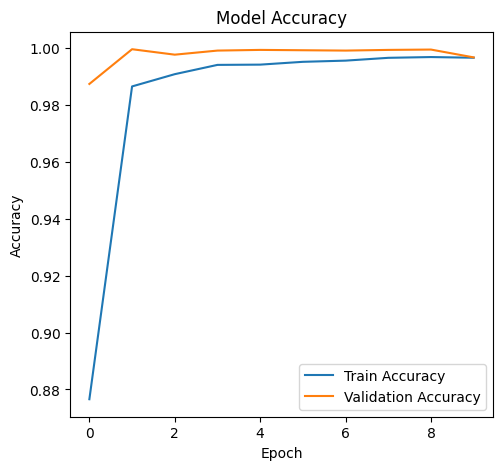

In [15]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


# Plot training & validation loss

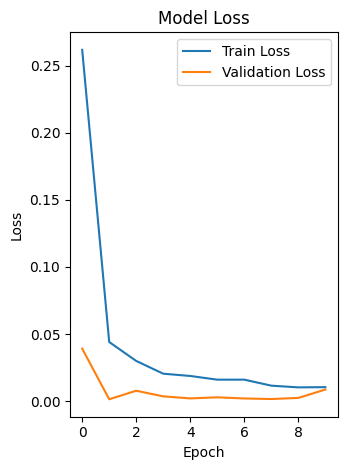

In [16]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on the test set


In [17]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step



# Compute and print performance metrics


In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import numpy as np

# Assuming `predicted_probabilities` contains the probability scores for each class
# and `predicted_labels` contains the predicted class labels
predicted_probabilities = model.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)  # Convert probabilities to class labels

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)



262/262 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
Confusion Matrix:
[[4516   27]
 [   1 3815]]


In [27]:
# Calculate and print classification report
class_report = classification_report(y_test, predicted_labels, target_names=categories)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

      Drowsy       1.00      0.99      1.00      4543
  Non Drowsy       0.99      1.00      1.00      3816

    accuracy                           1.00      8359
   macro avg       1.00      1.00      1.00      8359
weighted avg       1.00      1.00      1.00      8359




# Load the trained model

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model  # Correct import for load_model
import tkinter as tk
from tkinter import Label, Button
from PIL import Image, ImageTk
import threading

# Load the trained model
model = load_model('C:/Users/pirai/Downloads/Driver Drowsiness Dataset (DDD)/drowsiness_detection_model_1.h5')


In [4]:
# Initialize HAAR Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

class DrowsinessDetectionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Drowsiness Detection System")
        self.root.geometry("900x600")

        # Initialize webcam and video frame
        self.cap = cv2.VideoCapture(0)
        self.panel = Label(root)
        self.panel.pack(padx=10, pady=10)

        # Control buttons
        self.start_button = Button(root, text="Start Detection", command=self.start_detection, font=('Helvetica', 14))
        self.start_button.pack(side="left", padx=20, pady=20)

        self.stop_button = Button(root, text="Stop Detection", command=self.stop_detection, font=('Helvetica', 14))
        self.stop_button.pack(side="left", padx=20, pady=20)

        self.exit_button = Button(root, text="Exit", command=self.root.quit, font=('Helvetica', 14))
        self.exit_button.pack(side="left", padx=20, pady=20)

        self.detection_active = False

    def start_detection(self):
        self.detection_active = True
        self.detect_drowsiness()

    def stop_detection(self):
        self.detection_active = False

    def detect_drowsiness(self):
        if not self.detection_active:
            return

        ret, frame = self.cap.read()
        if not ret:
            print("Failed to grab frame")
            self.root.after(10, self.detect_drowsiness)
            return

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x, y, w, h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_gray_resized = cv2.resize(roi_gray, (64, 64))
            roi_gray_resized = roi_gray_resized.reshape(1, 64, 64, 1) / 255.0

            prediction = model.predict(roi_gray_resized)
            confidence = prediction[0][np.argmax(prediction)]
            
            # Remove debugging print statement
            # print(f"Prediction: {prediction}, Confidence: {confidence}")

            if np.argmax(prediction) == 0 and confidence > 0.7:  # 0.7 is a threshold; adjust based on your model's output
                status = 'Drowsy'
                color = (0, 0, 255)
            else:
                status = 'Alert'
                color = (0, 255, 0)

            cv2.putText(frame, status, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 3)
        
        # Convert frame to ImageTk format
        img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)
        imgtk = ImageTk.PhotoImage(image=img)

        # Update the image panel
        self.panel.imgtk = imgtk
        self.panel.config(image=imgtk)

        self.root.after(10, self.detect_drowsiness)

    def __del__(self):
        self.cap.release()
        cv2.destroyAllWindows()

if __name__ == "__main__":
    root = tk.Tk()
    app = DrowsinessDetectionApp(root)
    root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

: 